In [2]:
import pandas as pd
from matplotlib import pyplot  as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
df["Pregnancies"].value_counts()

,count
Pregnancies,
1,135
0,111
2,103
3,75
4,68
5,57
6,50
7,45
8,38


In [11]:
legit=df[df.Pregnancies==0]
fraud=df[df.Pregnancies==1]

In [12]:
legit.shape


(111, 9)

In [13]:
fraud.shape

(135, 9)

In [15]:
legit.BMI.describe()

,BMI
count,111.000000
mean,34.290090
std,10.341619
min,0.000000
25%,27.850000
50%,34.600000
75%,41.500000
max,67.100000


In [17]:
df.groupby('Pregnancies').mean()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
0,123.000000,67.153153,22.270270,81.675676,34.290090,0.520838,27.603604,0.342342
1,112.748148,67.792593,24.437037,98.674074,31.372593,0.486496,27.370370,0.214815
2,110.796117,63.252427,21.601942,85.844660,30.583495,0.491660,27.194175,0.184466
3,123.586667,66.586667,20.080000,87.453333,30.425333,0.432147,29.026667,0.360000
4,125.117647,70.029412,15.882353,69.441176,32.141176,0.446353,32.779412,0.338235
5,118.859649,76.210526,17.385965,57.298246,33.192982,0.396421,39.035088,0.368421
6,120.800000,68.420000,17.640000,63.580000,30.290000,0.429520,39.340000,0.320000
7,136.444444,70.777778,20.288889,84.466667,32.631111,0.443622,41.111111,0.555556
8,131.736842,75.184211,17.315789,92.815789,31.568421,0.504711,45.368421,0.578947


In [19]:
# Check the number of rows in the legit DataFrame
legit_size = len(legit)

# Set the sample size to the minimum of 492 and the number of rows in legit
sample_size = min(492, legit_size)

# Sample the data
legit_sample = legit.sample(n=sample_size, random_state=42)  # random_state for reproducibility

In [21]:
df_new= pd.concat([legit_sample, fraud], axis=0) #to create 50:50 ratio to balance the both legit and fraid dataset

In [22]:
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
506,0,180,90,26,90,36.5,0.314,35,1
109,0,95,85,25,36,37.4,0.247,24,1
58,0,146,82,0,0,40.5,1.781,44,0
537,0,57,60,0,0,21.7,0.735,67,0
448,0,104,64,37,64,33.6,0.510,22,1


In [24]:
df_new["Pregnancies"].value_counts()

,count
Pregnancies,
1,135
0,111


In [26]:
X= df_new.drop(columns='Pregnancies', axis=1) # will drop class column from dataset
y= df_new['Pregnancies'] #since class is target variable  it will contain both legit and fraud data corresponding to each row

In [27]:
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2,stratify=y, random_state=2) #stratify y to preserve the distribution of the target variable (y) across the training and test sets

In [28]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(196, 8) (196,) (50, 8) (50,)


In [29]:
lm = LogisticRegression()

In [30]:
lm.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
X_train_predict=lm.predict(X_train)
train_accuracy=accuracy_score(X_train_predict,Y_train)

In [32]:
print("accuracy:",train_accuracy)

accuracy: 0.6632653061224489


In [33]:
X_test_predict=lm.predict(X_test)
test_accuracy=accuracy_score(X_test_predict,Y_test)
print("accuracy:",test_accuracy)


accuracy: 0.6


x is other feature and y is target feature so training is evaluating accuracy of old data where testing is accuracy of unseen data  we compare accuracy of unseen data with old data to see how much accurate is new data
we check accuracy.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [35]:
data = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/diabetes.csv")

In [38]:
X = data[['BMI']]  # Double brackets to keep it a dataframe
y = data['Age']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)

In [42]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

Mean Squared Error: 114.32
Coefficient (slope): 0.01
Intercept: 33.11


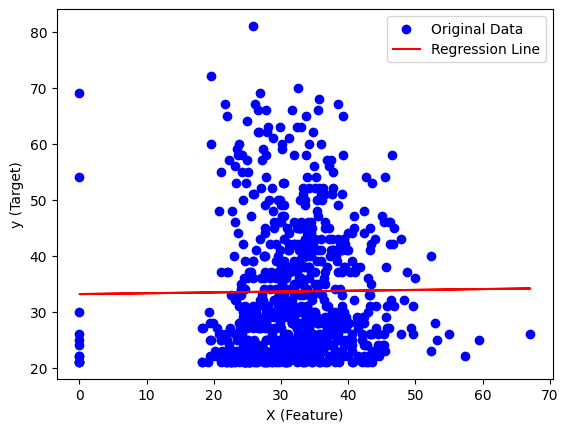

In [43]:
plt.scatter(X, y, color='blue', label="Original Data")
plt.plot(X, model.predict(X), color='red', label="Regression Line")
plt.xlabel("X (Feature)")
plt.ylabel("y (Target)")
plt.legend()
plt.show()